In [ ]:
%pylab inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.utils.data as Data
import torch.optim as optim

from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torchvision import transforms
from torchvision.datasets import MNIST


Populating the interactive namespace from numpy and matplotlib


In [ ]:
train = MNIST('./data', train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

test = MNIST('./data', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

# Create DataLoader

def get_indices(dataset,class_names):
    indices =  []
    for i in range(len(dataset.targets)):
        if dataset.targets[i] in class_names: ## get class zero and one
            indices.append(i)
    return indices
#selected_classes = [5,6]
selected_classes = [0,1]
train_idx = get_indices(train, selected_classes)
test_idx = get_indices(test, selected_classes)


dataloader_args = dict(shuffle=False, batch_size=64,num_workers=1, pin_memory=True)
train_loader = dataloader.DataLoader(train, **dataloader_args, sampler = Data.sampler.SubsetRandomSampler(train_idx))
test_loader = dataloader.DataLoader(test, **dataloader_args, sampler = Data.sampler.SubsetRandomSampler(test_idx))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
#train_data = train.train_data
#train_data = train.transform(train_data.numpy())
#
#print('[Train]')
#print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
#print(' - Tensor Shape:', train.train_data.size())
#print(' - Transformed Shape:', train_data.size())
#print(' - min:', torch.min(train_data))
#print(' - max:', torch.max(train_data))
#print(' - mean:', torch.mean(train_data))
#print(' - std:', torch.std(train_data))
#print(' - var:', torch.var(train_data))

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.fc1 = nn.Linear(784, 548)
        #self.bc1 = nn.BatchNorm1d(548)
        #self.fc2 = nn.Linear(548, 252)
        #self.bc2 = nn.BatchNorm1d(252)
        #self.fc3 = nn.Linear(252, 10)
        self.fc2 = nn.Linear(548, 1)
        
        
    def forward(self, x):
        x = x.view((-1, 784))
        h = self.fc1(x)
        #h = self.bc1(h)
        #h = F.relu(h)
        h = F.sigmoid(h)
        #h = F.dropout(h, p=0.5, training=self.training)
        h = self.fc2(h)
        #h = self.bc2(h)
        #h = F.relu(h)
        #h = F.sigmoid(h)
        #h = F.dropout(h, p=0.2, training=self.training)
        #h = self.fc3(h)
        #out = F.log_softmax(h)
        out = h
        return out

model = Model()
model.cuda() # CUDA!
optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9, weight_decay=1e-4)
criterion = nn.BCEWithLogitsLoss() ### sigmoid cross entropy...

In [ ]:
#F.one_hot( target , 2)
#target

In [ ]:
#target
#y_pred

In [ ]:
model.train()

losses = []
for epoch in range(1):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Get Samples
        data = Variable(data.view(-1,784))
        sample_data = data.bernoulli()
        data, target = Variable(sample_data.cuda()), Variable(target.cuda())
        
        # Init
        optimizer.zero_grad()

        # Predict
        y_pred = model(data) 

        target = (target == selected_classes[1])*1
        target = target.unsqueeze(1).float()

        with torch.no_grad():
            model_weight <- model_weights
            otherloss = ...

        # Calculate loss
        #target_one_hot = F.one_hot( target , 10)
        #loss = F.cross_entropy(y_pred, target_one_hot)
        loss = criterion(y_pred, target)
        losses.append(loss.data.item())
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        # Display
        if batch_idx % 100 == 1:
            print('\r Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, 
                batch_idx * len(data), 
                len(train_loader.dataset),
                100. * batch_idx / len(train_loader), 
                loss.data.item()), 
                end='')
            
    print()

 Train Epoch: 0 [6464/60000 (51%)]	Loss: 0.002799


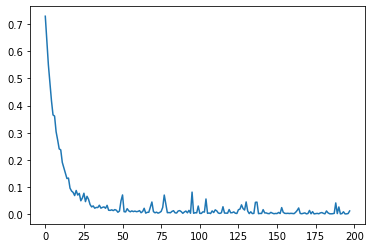

In [ ]:
plot(losses)


In [ ]:
evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor())).cuda()[test_idx]
evaluate_y = Variable(test_loader.dataset.test_labels).cuda()[test_idx]


output = model(evaluate_x)
pred = ((output.data > 0)*1.).squeeze()
d = pred.eq((evaluate_y.data == selected_classes[1])*1).cpu()
accuracy = d.sum()/d.size()[0]

print('Accuracy:', accuracy)

Accuracy: tensor(0.9986)


In [ ]:
#Variable(train_loader.dataset.train_data.type_as(torch.FloatTensor())).cuda().shape
#Variable(train_loader.dataset.test_labels).cuda()
#test_loader.dataset.test_labels[test_idx]
#pred.squeeze()

In [ ]:
#test_idx[0]

In [ ]:
model.fc1.weight.max()

tensor(0.1302, device='cuda:0', grad_fn=<MaxBackward1>)

In [ ]:
model.fc1.weight.min()

tensor(-0.1244, device='cuda:0', grad_fn=<MinBackward1>)

In [ ]:
model.fc1.bias.max()

tensor(0.0818, device='cuda:0', grad_fn=<MaxBackward1>)

In [ ]:
model.fc1.bias.min()

tensor(-0.0930, device='cuda:0', grad_fn=<MinBackward1>)

In [ ]:
model.fc2.weight.max()

tensor(0.0793, device='cuda:0', grad_fn=<MaxBackward1>)

In [ ]:
model.fc2.weight.min()

tensor(-0.0652, device='cuda:0', grad_fn=<MinBackward1>)

In [ ]:
# Frances
class Energy_Based_Model(nn.Module):
   def __init__(self,
               n_vis=784 + 1, ## one extra for the output
               n_hin=548,
               k=5):
        super(Energy_Based_Model, self).__init__()
        self.W = nn.Parameter(torch.randn(n_hin,n_vis)*1e-2)
        self.v_bias = nn.Parameter(torch.zeros(n_vis))
        self.h_bias = nn.Parameter(torch.zeros(n_hin))
        self.n_vis = n_vis 
        self.k = k
    
   def sample_from_p(self,p):
       return F.relu(torch.sign(p - Variable(torch.rand(p.size()))))
    
   def v_to_h(self,v):
        p_h = F.sigmoid(F.linear(v,self.W,self.h_bias))
        sample_h = self.sample_from_p(p_h)
        return p_h,sample_h
    
   ## not necessary
   def h_to_v(self,h):
        p_v = F.sigmoid(F.linear(h,self.W.t(),self.v_bias))
        sample_v = self.sample_from_p(p_v)
        return p_v,sample_v

   def h_to_out(self,h):
        p_out = F.sigmoid(F.linear(h,self.W.t()[-1:],self.v_bias[-1:]))
        sample_out = self.sample_from_p(p_out)
        return p_out,sample_out
        
   def forward(self,input_data):
        #v = torch.zeros( self.n_vis ) 
        #v[:-1] = input_data
        #v[-1] = 0.5
        v = input_data ## it includes output logit
        pre_h1,h1 = self.v_to_h(v)
        h_ = h1
        v_ = v
        for _ in range(self.k):
            pre_out,out_ = self.h_to_out(h_)
            v_[:,-1:] = out_
            pre_h_,h_ = self.v_to_h(v_)
        
        return v,v_

   def sample_from_distribution(self):
       v = Variable(torch.rand((100, self.n_vis)))
       for i in range(1000):
           pre_h,h = self.v_to_h(v)
           pre_v,v = self.h_to_v(h)
       return v


   #def free_energy(self,v):
   #     vbias_term = v.mv(self.v_bias)
   #     wx_b = F.linear(v,self.W,self.h_bias)
   #     hidden_term = wx_b.exp().add(1).log().sum(1)
   #     return (-hidden_term - vbias_term).mean()






In [ ]:

class Energy_Based_Model(nn.Module):
   def __init__(self,
               n_vis=784 + 1, ## one extra for the output
               n_hin=548,
               k=5):
        super(Energy_Based_Model, self).__init__()
        self.W = nn.Parameter(torch.randn(n_hin,n_vis)*1e-2)
        self.v_bias = nn.Parameter(torch.zeros(n_vis))
        self.h_bias = nn.Parameter(torch.zeros(n_hin))
        self.n_vis = n_vis 
        self.k = k
    
   def sample_from_p(self,p):
       return F.relu(torch.sign(p - Variable(torch.rand(p.size()))))
    
   def v_to_h(self,v):
        p_h = F.sigmoid(F.linear(v,self.W,self.h_bias))
        sample_h = self.sample_from_p(p_h)
        return p_h,sample_h
    
   ## not necessary
   def h_to_v(self,h):
        p_v = F.sigmoid(F.linear(h,self.W.t(),self.v_bias))
        sample_v = self.sample_from_p(p_v)
        return p_v,sample_v

   def h_to_out(self,h):
        p_out = F.sigmoid(F.linear(h,self.W.t()[-1:],self.v_bias[-1:]))
        sample_out = self.sample_from_p(p_out)
        return p_out,sample_out
        
   def forward(self,input_data):
        #v = torch.zeros( self.n_vis ) 
        #v[:-1] = input_data
        #v[-1] = 0.5
        v = input_data ## it includes output logit
        pre_h1,h1 = self.v_to_h(v)
        h_ = h1
        v_ = v
        for _ in range(self.k):
            pre_out,out_ = self.h_to_out(h_)
            #v_[:,-1:] = out_
            #v_[:,-1:].copy_( out_ )
            #v_[:, :-1] = v_[:, :-1]

            v__ = torch.cat( ( v_[:,:-1], out_) , 1)
            pre_h_,h_ = self.v_to_h(v__)
            v_ = v__
        return v,v_

   def sample_from_distribution(self):
       v = Variable(torch.rand((100, self.n_vis)))
       for i in range(1000):
           pre_h,h = self.v_to_h(v)
           pre_v,v = self.h_to_v(h)
       return v


   def free_energy(self,v):
        vbias_term = v.mv(self.v_bias)
        wx_b = F.linear(v,self.W,self.h_bias)
        hidden_term = wx_b.exp().add(1).log().sum(1)
        return (-hidden_term - vbias_term).mean()






In [ ]:
for epoch in range(1):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Get Samples
        data, target = Variable(data.cuda()), Variable(target.cuda())
        data = Variable(data.view(-1,784))
        sample_data = data.bernoulli()
        v = torch.cat( (sample_data, Variable(target.unsqueeze(1))), 1)

In [ ]:
energy_based_model = Energy_Based_Model(k=20)

## load the feedforward model in the energy model
with torch.no_grad():
    energy_based_model.W.copy_( torch.cat( (model.fc1.weight, model.fc2.weight.t()),1) )
    energy_based_model.h_bias.copy_( model.fc1.bias )
    energy_based_model.v_bias[-1:].copy_( model.fc2.bias )

In [ ]:
energy_based_model.W.shape

torch.Size([548, 785])

In [ ]:
model.fc1.weight.shape

torch.Size([548, 784])

In [ ]:
torch.cat( (model.fc1.weight, model.fc2.weight.t()),1).shape

torch.Size([548, 785])

In [ ]:
energy_based_model.v_bias.shape

torch.Size([785])

In [ ]:
energy_based_model.h_bias.shape

torch.Size([548])

In [ ]:
model.fc1.bias.shape

torch.Size([548])

In [ ]:
data.shape[0]


57

In [ ]:
energy_based_model = Energy_Based_Model(k=10)

In [ ]:
energy_based_model.W

Parameter containing:
tensor([[ 0.0041,  0.0147,  0.0041,  ..., -0.0092, -0.0085, -0.0302],
        [ 0.0009,  0.0046,  0.0129,  ...,  0.0051,  0.0056, -0.0255],
        [ 0.0049, -0.0064, -0.0115,  ...,  0.0040, -0.0012, -0.0331],
        ...,
        [-0.0131,  0.0065,  0.0037,  ..., -0.0100, -0.0162,  0.0469],
        [-0.0051, -0.0171,  0.0098,  ..., -0.0067,  0.0053, -0.0211],
        [ 0.0060, -0.0066, -0.0027,  ..., -0.0037, -0.0041, -0.0248]],
       requires_grad=True)

In [ ]:
energy_based_model.W.max()

tensor(0.1138, grad_fn=<MaxBackward1>)

In [ ]:
# train energy based model
energy_based_model = Energy_Based_Model(k=10)

train_op = optim.Adam(energy_based_model.parameters(), lr=0.001)
count = 0
for epoch in range(1):
    loss_ = []
    for _, (data,target) in enumerate(train_loader):
        data = Variable(data.view(-1,784))
        sample_data = data.bernoulli()
        v = torch.cat( (sample_data, Variable(target.unsqueeze(1))), 1)

        dist = torch.empty(len(sample_data)).uniform_(0, 1)
        sample_y = torch.bernoulli(dist)
        # print(sample_data.size())
        # print(sample_y)
        vinit = torch.cat( (sample_data, sample_y.view(-1, 1)), 1)
        _,v1 = energy_based_model(v)
        #print(v,v1)

        with torch.no_grad():
            model_weight <- model_weights
            otherloss = ...
            

        loss = energy_based_model.free_energy(v) - energy_based_model.free_energy(v1)
        print("Training loss: {}".format(loss.data))
        loss_.append(loss.data)

        # print(loss.data)
        train_op.zero_grad()
        loss.backward()
        train_op.step()
    #     break
    # break

    print("Training loss for {} epoch: {}".format(epoch, np.mean(loss_)))


Training loss: -0.001129150390625
Training loss: -0.0250244140625
Training loss: -0.0555419921875
Training loss: -0.055267333984375
Training loss: -0.109161376953125
Training loss: -0.134429931640625
Training loss: -0.1146240234375
Training loss: -0.1561279296875
Training loss: -0.176513671875
Training loss: -0.2056884765625
Training loss: -0.234893798828125
Training loss: -0.2386474609375
Training loss: -0.222503662109375
Training loss: -0.300018310546875
Training loss: -0.291961669921875
Training loss: -0.25433349609375
Training loss: -0.297027587890625
Training loss: -0.3433837890625
Training loss: -0.192901611328125
Training loss: -0.288055419921875
Training loss: -0.22027587890625
Training loss: -0.13616943359375
Training loss: -0.26788330078125
Training loss: -0.119659423828125
Training loss: -0.211273193359375
Training loss: -0.33074951171875
Training loss: -0.066436767578125
Training loss: -0.187530517578125
Training loss: -0.10723876953125
Training loss: -0.10247802734375
Trai

In [ ]:
energy_based_model.W.min()

tensor(-0.1083, grad_fn=<MinBackward1>)

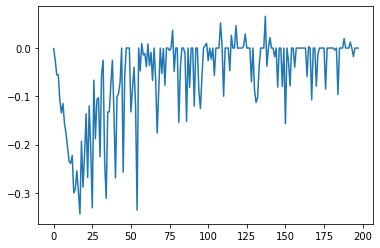

In [ ]:
plot(loss_)

In [ ]:
print(list(zip(v[:,-1],
v1[:,-1])))
print(target)

[(tensor(1.), tensor(1.)), (tensor(1.), tensor(1.)), (tensor(1.), tensor(1.)), (tensor(1.), tensor(1.)), (tensor(0.), tensor(0.)), (tensor(1.), tensor(1.)), (tensor(0.), tensor(0.)), (tensor(0.), tensor(0.)), (tensor(1.), tensor(1.)), (tensor(1.), tensor(1.)), (tensor(1.), tensor(1.)), (tensor(1.), tensor(1.)), (tensor(1.), tensor(1.)), (tensor(1.), tensor(1.)), (tensor(1.), tensor(1.)), (tensor(1.), tensor(1.)), (tensor(0.), tensor(0.)), (tensor(1.), tensor(1.)), (tensor(0.), tensor(0.)), (tensor(0.), tensor(0.)), (tensor(0.), tensor(0.)), (tensor(1.), tensor(1.)), (tensor(1.), tensor(1.)), (tensor(0.), tensor(0.)), (tensor(0.), tensor(0.)), (tensor(1.), tensor(1.)), (tensor(1.), tensor(1.)), (tensor(1.), tensor(1.)), (tensor(0.), tensor(0.)), (tensor(0.), tensor(0.)), (tensor(0.), tensor(0.)), (tensor(0.), tensor(0.)), (tensor(1.), tensor(1.)), (tensor(1.), tensor(1.)), (tensor(0.), tensor(0.)), (tensor(0.), tensor(0.)), (tensor(1.), tensor(1.)), (tensor(1.), tensor(1.)), (tensor(1.)

In [ ]:
target.shape

torch.Size([57])

In [ ]:
#Evaluate trained energy based model

for epoch in range(1):

    correct = 0
    images = 0
    for _, (data,target) in enumerate(test_loader):
        data = Variable(data.view(-1,784))
        sample_data = data.bernoulli()
        v = torch.cat( (sample_data, torch.zeros( (data.shape[0],1))), 1)
        prob_v,v = energy_based_model(v)
        #print(list(zip(target, v[:,-1]) ))

        for i in zip(target,v[:,-1]):

            if i[0] == selected_classes[int(i[1].data.item())]:
                correct+=1
            images+=1
    print(correct/images)
        #plt.imshow(sample_data[0])



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0.9938534278959811


In [ ]:
out_samples = energy_based_model.sample_from_distribution()

In [ ]:
for i in range(out_samples.shape[0]):
    plt.imshow(out_samples[i][:-1].detach().numpy().reshape((28,28)))
    plt.show()

In [ ]:
#plt.imshow(data.bernoulli()[0].cpu().numpy().reshape((28,28)))
plt.imshow(v[0].detach().cpu().numpy()[:-1].reshape((28,28)))

print(v[0][-1])


In [ ]:
(data.bernoulli()[0].cpu().numpy()).shape

In [ ]:
sample_data.shape